# Lost Items on the Parliamentary Estate

## Introduction

The Parliamentary Estate is the land and buildings used by the Parliament of the United Kingdom.

The most notable part of the Parliamentary Estate is the Palace of Westminster, where the chambers of both houses of Parliament (the Commons and the Lords) are located. The oldest part of the Palace of Westminster is Westminster Hall, the historic core of the building; the present-day Palace of Westminster was built after a major fire in 1834 destroyed all of the palace except for Westminster Hall, the Chapel of St Mary Undercroft, the Cloisters and Chapter House of St Stephen's, and the Jewel Tower.[2] The palace includes two courtyards, the Old Palace Yard and New Palace Yard; the former dates to the time of Edward the Confessor, while the latter was built in 1097 on the orders of William II (Rufus).[3]

The northern part of the Parliamentary Estate lies north of Bridge Street. It includes Canon Row; Parliament Street; Derby Gate (formerly the Whitehall Club); houses office space for parliamentary staff and the Commons Library); Norman Shaw North and Norman Shaw South (two 1890s buildings, both containing office space for members of Parliament (MPs) and their staff); Portcullis House (an office building for MPs and staff, opened February 2001); and Richmond House and Richmond Terrace (which became part of the Parliamentary Estate in January 2018)

[Wikipedia](https://en.wikipedia.org/wiki/Parliamentary_Estate)

Items lost on the parliamentary estate are recorded and data going back to 2013 can be downloaded.

[Parliamentary Estate Lost Items Data](https://www.parliament.uk/site-information/freedom-of-information/information-we-already-publish/house-of-commons-publication-scheme/buildings-and-maintenance/lost-property-on-the-parliamentary-estate/)

As a general rule, items that have not been claimed after three months (or six months for electronic items) are either donated to charity or destroyed. All unclaimed items containing personal data are destroyed after the time periods noted above.

Property handed in may belong to people working on the parliamentary estate (i.e. House staff, Members, Peers, etc.) or visitors. Property handed in may belong to people working on the parliamentary estate (i.e. House staff, Member)s, Peers, etc.) or visitors.  

This project was inspired by a data analysis project looking at lost items on London trains by Dmitrii Eliuseev.

[Exploratory Data Analysis: Lost Property Items on the Transport of London](https://towardsdatascience.com/exploratory-data-analysis-lost-property-items-on-the-transport-of-london-5ffa519b24a6).

## Imports of libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

The files are a xixture of pdf, csv and xlsx files - all files were converted to csv

In [4]:
# Set path
path = r'C:\Users\imoge\AllMLProjects\Data\LostProperty'

# Get all files
all_files = glob.glob(os.path.join(path, "*.csv"))

# show files
all_files

['C:\\Users\\imoge\\AllMLProjects\\Data\\LostProperty\\Jan--Jun2018.csv',
 'C:\\Users\\imoge\\AllMLProjects\\Data\\LostProperty\\Jan--June2016.csv',
 'C:\\Users\\imoge\\AllMLProjects\\Data\\LostProperty\\Jan--June2017.csv',
 'C:\\Users\\imoge\\AllMLProjects\\Data\\LostProperty\\Jan--June2019.csv',
 'C:\\Users\\imoge\\AllMLProjects\\Data\\LostProperty\\Jan--June2020.csv',
 'C:\\Users\\imoge\\AllMLProjects\\Data\\LostProperty\\Jan--June2021.csv',
 'C:\\Users\\imoge\\AllMLProjects\\Data\\LostProperty\\Jan--June2022.csv',
 'C:\\Users\\imoge\\AllMLProjects\\Data\\LostProperty\\Jan--June2023.csv',
 'C:\\Users\\imoge\\AllMLProjects\\Data\\LostProperty\\Jan-June2015.csv',
 'C:\\Users\\imoge\\AllMLProjects\\Data\\LostProperty\\Jul--Dec2015.csv',
 'C:\\Users\\imoge\\AllMLProjects\\Data\\LostProperty\\July--Dec2016.csv',
 'C:\\Users\\imoge\\AllMLProjects\\Data\\LostProperty\\July--Dec2019.csv',
 'C:\\Users\\imoge\\AllMLProjects\\Data\\LostProperty\\July--Dec2020.csv',
 'C:\\Users\\imoge\\AllMLPro

We can't just read them all in and concatenate into one dataframe as the entry into these worksheets was not consistent. Looking through the spreadsheets, some information is included for some periods and not for others. 

We will work with 2022 as a full year as we only have the first half of 2023 at the time of doing the notebook. We will have a look at one of the earlier years later on.

In [5]:
# Read in the data
df2022jantojune = pd.read_csv(all_files[6])
df2022jultodec = pd.read_csv(all_files[14])

print(df2022jantojune.shape, df2022jultodec.shape)

(518, 4) (703, 4)


## Data cleaning

In [6]:
df2022jantojune.head()

,Date,Item,Claimed by,Claimed/Charity/recycled/ disposed on
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Jan-22,ELECTRONICS,CHARITY,29/04/2022
3,Jan-22,KEY(S),LOCKSMITH,30/05/2022
4,Jan-22,ELECTRONICS,CLAIMED,10/01/2022


In [7]:
# Drop the first two rows
df2022jantojune = df2022jantojune.iloc[2:,:]

In [8]:
df2022jultodec.head()

,Date,Item,Claimed by,Claimed/Charity/recycled/ disposed on
0,Jul-22,MISCELLANEOUS,DISPOSED,12/10/2022
1,Jul-22,GLASSES,CLAIMED,12/07/2022
2,Jul-22,KEY(S),LOCKSMITH,07/10/2022
3,Jul-22,MISCELLANEOUS,RECYCLED,12/10/2022
4,Jul-22,GLASSES,CHARITY - OPT,06/12/2022


In [9]:
# Join these tables
df2022 = pd.concat([df2022jantojune,df2022jultodec])
print(df2022.shape)
df2022.head()

(1219, 4)


,Date,Item,Claimed by,Claimed/Charity/recycled/ disposed on
2,Jan-22,ELECTRONICS,CHARITY,29/04/2022
3,Jan-22,KEY(S),LOCKSMITH,30/05/2022
4,Jan-22,ELECTRONICS,CLAIMED,10/01/2022
5,Jan-22,KEY(S),LOCKSMITH,30/05/2022
6,Jan-22,ELECTRONICS,CHARITY,29/04/2022


In [10]:
# Change the columns
df2022.columns = ['Date','Item','Action','Disposal_date']

In [11]:
df2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 2 to 702
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1208 non-null   object
 1   Item           1208 non-null   object
 2   Action         1186 non-null   object
 3   Disposal_date  1177 non-null   object
dtypes: object(4)
memory usage: 47.6+ KB


In [12]:
# check for nulls
df2022.isnull().sum()

Date             11
Item             11
Action           33
Disposal_date    42
dtype: int64

In [13]:
df2022[df2022['Date'].isnull()]

,Date,Item,Action,Disposal_date
48,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN
303,NaN,NaN,NaN,NaN
405,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN
159,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN
302,NaN,NaN,NaN,NaN
389,NaN,NaN,NaN,NaN


In [14]:
df2022[df2022['Item'].isnull()]

,Date,Item,Action,Disposal_date
48,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN
303,NaN,NaN,NaN,NaN
405,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN
159,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN
302,NaN,NaN,NaN,NaN
389,NaN,NaN,NaN,NaN


These just look like blank rows so we can remove them

In [15]:
# Put the indices of these into a list
remove = list(df2022[df2022['Date'].isnull()].index)
remove

[48, 126, 254, 303, 405, 117, 159, 301, 302, 389, 575]

In [16]:
# Filter to remove these rows
df2022 = df2022[~df2022.index.isin(remove)]

In [17]:
df2022.shape

(1198, 4)

In [18]:
df2022.head()

,Date,Item,Action,Disposal_date
2,Jan-22,ELECTRONICS,CHARITY,29/04/2022
3,Jan-22,KEY(S),LOCKSMITH,30/05/2022
4,Jan-22,ELECTRONICS,CLAIMED,10/01/2022
5,Jan-22,KEY(S),LOCKSMITH,30/05/2022
6,Jan-22,ELECTRONICS,CHARITY,29/04/2022


In [19]:
# Convert to a datetime object
df2022['Date'] = pd.to_datetime(df2022['Date'],format='%b-%y')

In [20]:
df2022.head()

,Date,Item,Action,Disposal_date
2,2022-01-01,ELECTRONICS,CHARITY,29/04/2022
3,2022-01-01,KEY(S),LOCKSMITH,30/05/2022
4,2022-01-01,ELECTRONICS,CLAIMED,10/01/2022
5,2022-01-01,KEY(S),LOCKSMITH,30/05/2022
6,2022-01-01,ELECTRONICS,CHARITY,29/04/2022


In [21]:
# check for nulls in the Action column
df2022[df2022['Action'].isnull()].head()

,Date,Item,Action,Disposal_date
56,2022-02-01,ELECTRONICS,NaN,NaN
134,2022-03-01,ELECTRONICS,NaN,NaN
146,2022-03-01,ELECTRONICS,NaN,NaN
170,2022-03-01,ELECTRONICS,NaN,NaN
205,2022-03-01,ELECTRONICS,NaN,NaN


In [22]:
# check for nulls in the Disposal Date column
df2022[df2022['Disposal_date'].isnull()].head()

,Date,Item,Action,Disposal_date
56,2022-02-01,ELECTRONICS,NaN,NaN
74,2022-02-01,GLASSES,RECYCLED,NaN
134,2022-03-01,ELECTRONICS,NaN,NaN
146,2022-03-01,ELECTRONICS,NaN,NaN
165,2022-03-01,CASH,CHARITY,NaN


We still have some nulls in the Action column and disposal date, which we will set to 'Not Claimed' and 'NA' respectively

In [23]:
# Fill missing values
df2022['Action'].fillna('Not Claimed',inplace = True)
df2022['Disposal_date'].fillna('-', inplace = True)

In [24]:
# Check the unique values in date and item column
print(df2022['Date'].unique())
print('\n')
print(df2022['Item'].unique())

['2022-01-01T00:00:00.000000000' '2022-02-01T00:00:00.000000000'
 '2022-03-01T00:00:00.000000000' '2022-04-01T00:00:00.000000000'
 '2022-05-01T00:00:00.000000000' '2022-06-01T00:00:00.000000000'
 '2022-07-01T00:00:00.000000000' '2022-08-01T00:00:00.000000000'
 '2022-09-01T00:00:00.000000000' '2022-10-01T00:00:00.000000000'
 '2022-11-01T00:00:00.000000000' '2022-12-01T00:00:00.000000000']


['ELECTRONICS' 'KEY(S)' 'MISCELLANEOUS' 'COAT/JACKET' 'JUMPER/CARDIGAN'
 'SHOES/BOOTS' 'BAG' 'OYSTERCARD' 'UMBRELLA' 'PASSPORT' 'WALLET/PURSE'
 'JEWELLERY' 'DEBIT/CREDIT CARD' 'SCARF' 'GLOVE(S)' 'DOCUMENTS/PAPERS'
 'GLASSES' 'BOTTLE/CUP/MUG' 'HAT' 'HEARING AID' 'BELT' 'ID CARD'
 'DRIVING LICENCE' 'WATCH' 'CASH' 'KEY' 'WATER BOTTLE' 'GLOVE' 'HAIRBRUSH'
 'HOTEL ROOM CARD' 'OYSTER CARD' 'LAPTOP' 'AIRPODS' 'DEBIT CARD' 'PEN'
 'TIE' 'COAT' 'JEWELLERY ' 'KEYS' 'BROWN WALLET ']


We can see that we have quite specific item descriptions such as brown wallet instead of just wallet, Oystercard is spelt differently and keys are there twice amongst other issues.

In [27]:
# Replace the item categories
df2022['Item'] = df2022['Item'].replace({'KEY(S)':'KEYS','KEY':'KEYS','OYSTERCARD':'OYSTER CARD','GLOVE(S)':'GLOVES',
                                         'GLOVE':'GLOVES','DEBIT CARD':'DEBIT/CREDIT CARD','COAT':'COAT/JACKET',
                                        'JEWELLERY ':'JEWELLERY','BROWN WALLET ':'WALLET/PURSE',
                                         'WATER BOTTLE':'BOTTLE/CUP/MUG','LAPTOP':'ELECTRONICS','WATCH':'JEWELLERY',
                                        'DRIVING LICENCE':'DL/PASSPORT','PASSPORT':'DL/PASSPORT','AIRPODS':'ELECTRONICS'})

In [28]:
# Check the unique categories for items
df2022['Item'].unique()

array(['ELECTRONICS', 'KEYS', 'MISCELLANEOUS', 'COAT/JACKET',
       'JUMPER/CARDIGAN', 'SHOES/BOOTS', 'BAG', 'OYSTER CARD', 'UMBRELLA',
       'DL/PASSPORT', 'WALLET/PURSE', 'JEWELLERY', 'DEBIT/CREDIT CARD',
       'SCARF', 'GLOVES', 'DOCUMENTS/PAPERS', 'GLASSES', 'BOTTLE/CUP/MUG',
       'HAT', 'HEARING AID', 'BELT', 'ID CARD', 'CASH', 'HAIRBRUSH',
       'HOTEL ROOM CARD', 'PEN', 'TIE'], dtype=object)

In [29]:
# Have a look at the unique entries for Action column
print(df2022['Action'].unique())

['CHARITY' 'LOCKSMITH' 'CLAIMED ' 'DISPOSED' 'RECYCLED ' 'RECYCLED'
 'DESTROYED' 'CHARITY  -  OPT' 'Not Claimed' 'DISPOSED/CHARITY'
 'CLAIMED  ' 'CLAIMED' 'POSTED TFL' 'POSTED DVLA' 'POSTED (AUTHORISED DI)'
 'RECYLED' 'DRIVING RETURNED TO DVLA' 'RECYCLED/CHARITY/DISPOSED '
 'RETURNED' 'POSTED TO ARGENTINE CONSULATE' 'CHARITY   '
 'POSTED CHILTERN RAILWAYS' 'CHARITY     ' 'CHARITY    '
 'HAND DELIVERED TO                          NEW SCOTLAND YARD'
 'CHARITY - OPT' 'RETURNED TO DVLA/ DESTROYED /CHARITY' 'CAMILA WHITEHEAD'
 'DRIVING LICENCE RETURNED TO DVLA / DESTROYED ' 'RETURNED TO TFL'
 'TO BE COLLECTED MID JULY ' 'TO BE COLLECTED MID JULY'
 'PASSPORT RETURNED TO EMBASSY /  DRIVING LICENCE RETURNED TO DVLA  / MONEY TO CHARITY / FORCES VET CARD RETURNED  / CARDS DESTROYED / WALLET CHARITY '
 'DESTROYED ' 'TO BE COLLECTED' 'RECYCLED / CHARITY/ DESTROYED (EXPIRED)'
 ' CHARITY / DRIVING LICENCERETURNED TO DVLA /CARDS DESTROYED / CHARITY '
 'COLLECTED ' 'CHARITY  ' 'RECYCLED / DESTROYED' '

Again we have quite specific descriptions rather than consistent groupings

In [30]:
# Look at unique values of dates in the Disposal date column
df2022['Disposal_date'].unique()

array(['29/04/2022', '30/05/2022', '10/01/2022', '25/04/2022',
       '11/01/2022', '13/01/2022', '20/01/2022', '17/01/2022',
       '19/01/2022', '26/04/2022', '21/01/2022', '26/01/2022',
       '26/05/2022', '27/05/2022', '01/02/2022', '08/07/2022', '-',
       '03/02/2022', '09/02/2022', '16/06/2022', '14/02/2022',
       '10/03/2022', '15/02/2022', '22/02/2022', '28/02/2022',
       '01/03/2022', '25/02/2022', '10/06/2022', '02/03/2022',
       '08/03/2022', '04/03/2022', '03/03/2022', '09/03/2022',
       '21/04/2022', '15/03/2022', '11/03/2022', '29/06/2022',
       '17/03/2022', '22/07/2022', '24/06/2022', '16/03/2022',
       '21/03/2022', '03/08/2022', '22/06/2022', '18/03/2022',
       '01/04/2022', '29/03/2022', '22/03/2022', '23/03/2022',
       '07/10/2022', '04/07/2022', '24/03/2022', '13/07/2022',
       '20/04/2022', '25/03/2022', '28/03/2022', '19/03/2022',
       '25/07/2022', '30/03/2022', '31/03/2022', '09/05/2022',
       '07/04/2022', '07/07/2022', '04/10/2022', '

We have some dates entered not in date format here apart from the nan values, so we need to replace those with one date value or set them to missing

In [31]:
# Replace the values - where multiple dates we have used the first given date
df2022['Disposal_date'] = df2022['Disposal_date'].replace({'TO BE COLLECTED':'-','12/10/22 AND 14/10/22':'12/10/2022','LONG TERM SICK':'-',
                                                           "":'-','13/02/23 / 21/04/23 & 16/11/23':'13/02/2023','27/01/23 AND 16/11/23':'13/02/2023',
                                                           '01/03/2023 AND 10/03/23':'01/03/2023','17/01/12023':'17/01/2023','29/112022':'29/11/2022'
                                                          })


In [32]:
# Convert to a datetime object
df2022['Disposal_date'] = pd.to_datetime(df2022['Disposal_date'], format='%d/%m/%Y',errors='coerce')

In [33]:
# Check the type
df2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 2 to 702
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1198 non-null   datetime64[ns]
 1   Item           1198 non-null   object        
 2   Action         1198 non-null   object        
 3   Disposal_date  1165 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 46.8+ KB


We have done some basic cleaning but we will need to do more tasks as we go through the data to extract insights

## Data exploration

Now we have done some cleaning of the data, we can have a look at what we have got and ask some questions that might be interesting

#### Questions we might be interested in:

* when are items recorded by month?
* what items are being lost?
* what happens to them when claimed?
* when are items claimed by day/month?
* what is the time between recording and claiming?

### When are Items Lost?

In [34]:
# Extract a month column from the date (both a number and the month name)
df2022['Month'] = df2022['Date'].dt.month

# Month name
df2022['Month_name'] = df2022['Date'].dt.strftime('%b')

In [35]:
# Sort values by the month value
df2022 = df2022.sort_values(by = 'Month')

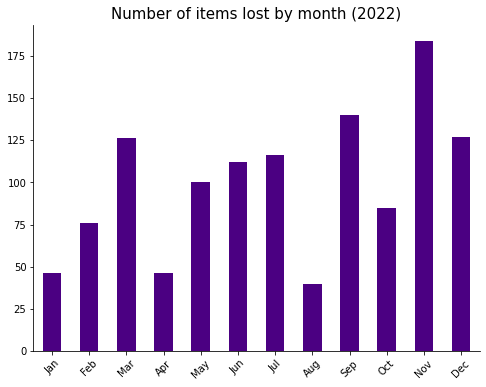

In [36]:
# Quick plot of the data
labels = df2022['Month_name'].unique()

fig, ax = plt.subplots(figsize = (8,6))
df2022.groupby('Month')['Item'].count().plot(kind = 'bar', color = 'indigo')
plt.title("Number of items lost by month (2022)",fontsize = 15)
plt.ylabel("")
plt.xticks(df2022['Month'].unique()-1, labels = labels,rotation = 45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("");

* We can see that the most items are recorded as lost in November and the least in August. 
* Parliament doesn't sit over the summer break so we would expect that fewer items would be lost at this time. 
* November is a popular time for dinners and events leading up to Christmas for external visitors to the House of Lords restaurant for example where items might well be more likely to go missing.
* We can have a look at the recess dates and see if this supports this.

[Recess Dates](https://whatson.parliament.uk/nonsittingperiods/)

#### House of Commons

* Christmas recess Start 17 December 2021 End 4 January 2022
* February recess - Start 11 February 2022 End 20 February 2022
* Easter recess - Start 1 April 2022 End 18 April 2022
* Whitsun recess - Start 27 May 2022 End 5 June 2022
* Summer Recess -  Start 22 July 2022 End 4 September 2022
* House adjourned for period of mourning for HM Queen Elizabeth II - Commons
* Start 12 September 2022 End 18 September 2022
* Conference Recess Start 26 September 2022 End 10 October 2022
* November Recess Start 10 November 2022 End 13 November 2022
* Christmas Recess Start 21 December 2022 End 8 January 2023

#### House of Lords

* Start 17 December 2021 End 4 January 2022
* Start 11 February 2022 End 18 February 2022
* Start 8 April 2022 End 24 April 2022
* Start 27 May 2022 End 5 June 2022
* Start 22 July 2022 End 4 September 2022
* Start 13 September 2022 End 15 September 2022
* Start 20 September 2022 End 9 October 2022
* Lords Start 10 November 2022 End 13 November 2022
* Lords Start 22 December 2022 End 8 January 2023



### What Items are Lost?

In [37]:
# Groupby item and sort number of each descending
lost_items = df2022.groupby('Item',as_index = False)['Date'].count().sort_values(by = 'Date',ascending = False).head(10)
lost_items

,Item,Date
19,MISCELLANEOUS,176
8,ELECTRONICS,171
16,JEWELLERY,104
9,GLASSES,96
0,BAG,73
25,UMBRELLA,61
4,COAT/JACKET,59
18,KEYS,57
22,SCARF,54
5,DEBIT/CREDIT CARD,52


In [43]:
df2022.groupby('Item',as_index = False)['Date'].count().sort_values(by = 'Date',ascending = False)['Item'].values

array(['MISCELLANEOUS', 'ELECTRONICS', 'JEWELLERY', 'GLASSES', 'BAG',
       'UMBRELLA', 'COAT/JACKET', 'KEYS', 'SCARF', 'DEBIT/CREDIT CARD',
       'BOTTLE/CUP/MUG', 'HAT', 'DOCUMENTS/PAPERS', 'GLOVES', 'ID CARD',
       'WALLET/PURSE', 'OYSTER CARD', 'DL/PASSPORT', 'JUMPER/CARDIGAN',
       'CASH', 'BELT', 'TIE', 'PEN', 'SHOES/BOOTS', 'HEARING AID',
       'HOTEL ROOM CARD', 'HAIRBRUSH'], dtype=object)

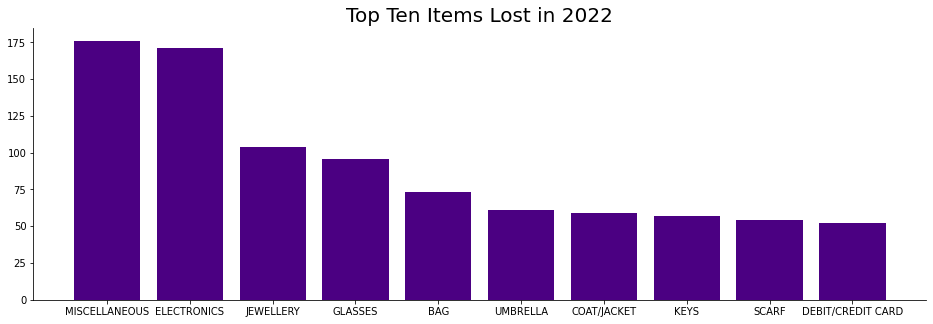

In [38]:
# Plot the top ten items on a barchart
fig, ax = plt.subplots(figsize = (16,5))
plt.bar(x= lost_items['Item'],height= lost_items['Date'],color = 'indigo')
plt.title('Top Ten Items Lost in 2022',fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

Can we see a pattern for losing some of these items in terms of the date?

In [40]:
# Groupby month and create a pivot table
lost_by_month = df2022.groupby(['Month','Item'],as_index = False)['Date'].count()
lost_by_month_pivot = lost_by_month.pivot(index = 'Month',columns = 'Item',values = 'Date')

# Set values to float 
lost_by_month_pivot = lost_by_month_pivot.iloc[:,0:].astype('float').T

# Fill nan values with dashes and transpose to have a look at the data
lost_by_month_pivot['Total'] = lost_by_month_pivot.sum(axis = 1)
lost_by_month_pivot_filled = lost_by_month_pivot.fillna('-')
lost_by_month_pivot_filled

Month,1,2,3,4,5,6,7,8,9,10,11,12,Total
Item,,,,,,,,,,,,,
BAG,1.0,3.0,14.0,8.0,2.0,6.0,3.0,3.0,9.0,8.0,11.0,5.0,73.0
BELT,-,2.0,1.0,-,2.0,2.0,-,-,-,-,2.0,1.0,10.0
BOTTLE/CUP/MUG,-,1.0,2.0,-,8.0,4.0,8.0,-,2.0,5.0,9.0,2.0,41.0
CASH,-,-,2.0,2.0,2.0,-,2.0,1.0,3.0,-,-,3.0,15.0
COAT/JACKET,4.0,6.0,10.0,3.0,1.0,9.0,3.0,1.0,6.0,5.0,7.0,4.0,59.0
DEBIT/CREDIT CARD,3.0,1.0,4.0,1.0,6.0,5.0,6.0,5.0,3.0,3.0,10.0,5.0,52.0
DL/PASSPORT,1.0,1.0,3.0,1.0,1.0,-,5.0,-,2.0,-,1.0,2.0,17.0
DOCUMENTS/PAPERS,1.0,2.0,6.0,2.0,3.0,4.0,5.0,-,-,1.0,7.0,3.0,34.0
ELECTRONICS,9.0,5.0,21.0,5.0,14.0,14.0,26.0,7.0,24.0,13.0,21.0,12.0,171.0


C:\Users\imoge\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


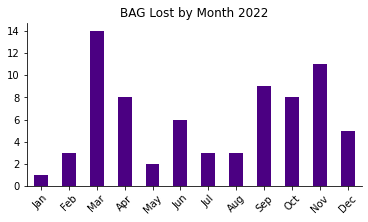

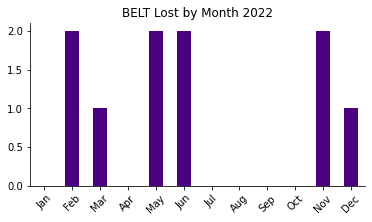

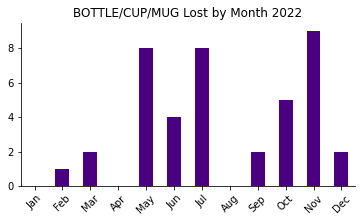

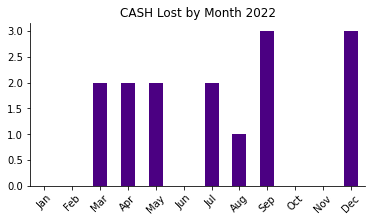

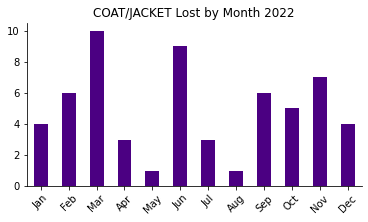

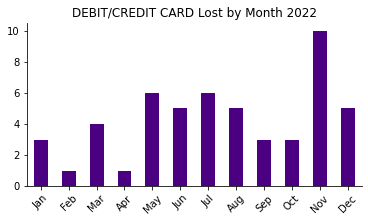

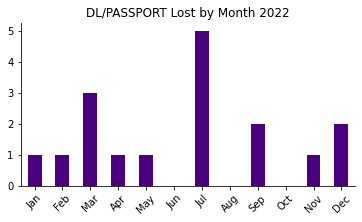

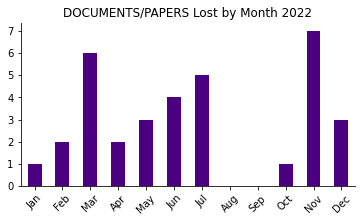

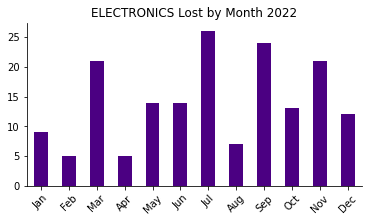

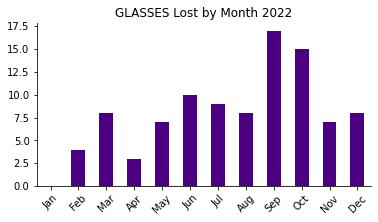

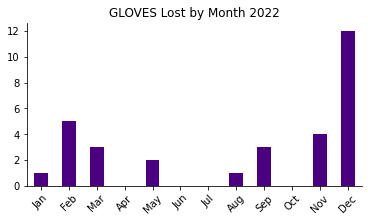

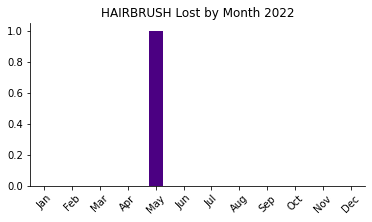

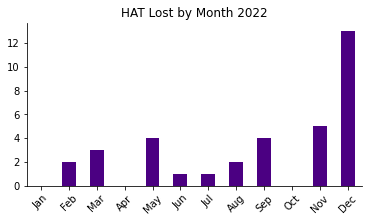

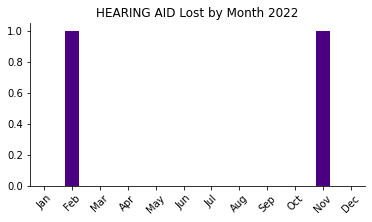

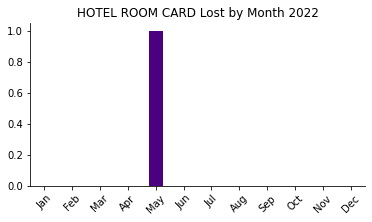

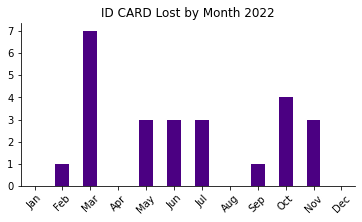

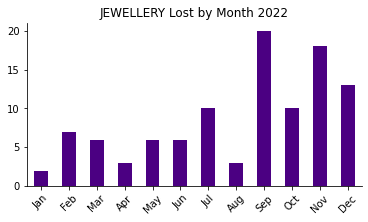

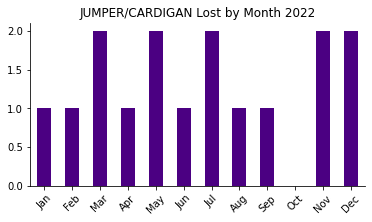

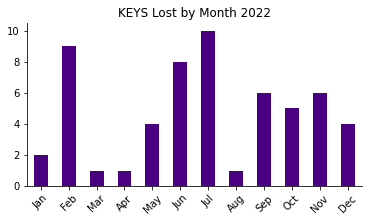

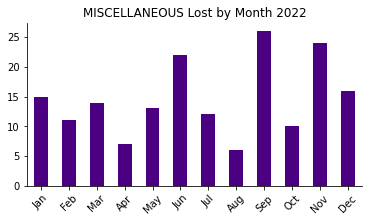

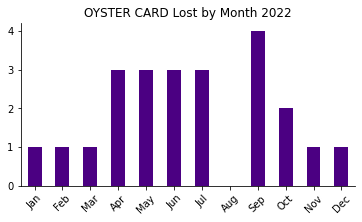

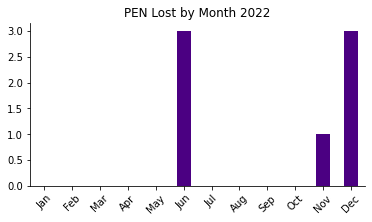

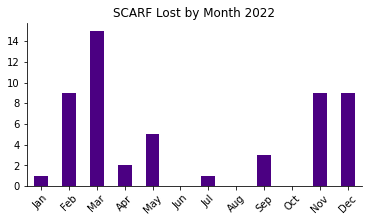

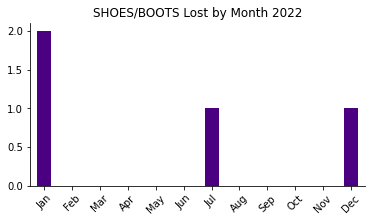

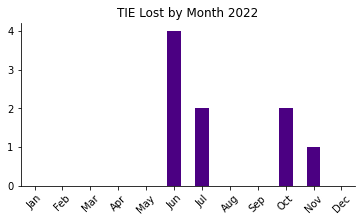

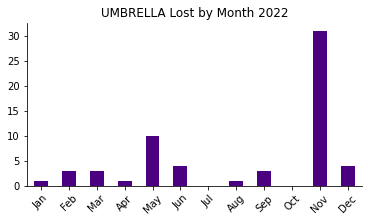

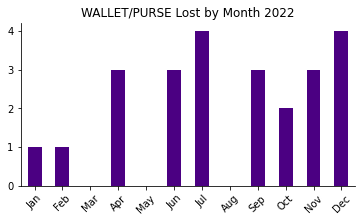

In [41]:
# Look at each of the lost items by month (Use the untransposed and unfilled dataframe

for column in lost_by_month_pivot.T.columns:
    plt.figure(figsize = (6,3))
    ax = lost_by_month_pivot.T[0:-1][column].plot(kind = 'bar',color = 'indigo')
    ax.set_xticks(lost_by_month_pivot.T[0:-1][column].index-1, labels = labels,rotation = 45)
    ax.set_xlabel("")
    plt.title(f'{column} Lost by Month 2022')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


#### Observations:

* We don't know much about the largest category of 'Miscellaneous' but the highest number of lost items were in September and November and the least in August when parliament is in recess. It is possible that this is a dump category where lots of items are coded for ease. 
* Electronics is the second largest item category and July is the month with the most lost items and February the lowest. We can assume this includes things such as laptops, ipads and phones amongst other things. These items may have been found after parliament sessions end for summer recess, or possibly from visitors to the estate.
* There is quite a lot of clothing in the mix. When attending events at the House of Lords for example, you can change into your event wear and this is likely why some of the clothing such as belts gets mislaid as well as due to changing seasons. 
* Jewellery includes watches as well as other jewellery items and we can see that November is the key time for losses also. 
* Bags are recorded lost primarily in March and November. 
* Scarves, ties, gloves, hats, coats/jackets and umbrellas being lost coincide with seasons of the year. 
* We see ties being lost in the hot summer months, shoes and boots in January as people might wear different shoes to get to work compared to within work, scarves removed in March as it warms up, jumpers across the year not associated with seasons, hats and gloves mainly reported lost in December and jackets and coats in March and June.
* September and October are the months most glasses (spectacles) get recorded as lost, which might reflect a busier period for parliament as it winds up towards the end of the year.
* Of concern is a relatively large number of lost ID cards, the most being in March. It is possible that a new system was introduced and after a large loss of 7 in March, that guidance was circulated so that the number dropped over the next six months. 
* Most driving licences,passports and keys seem to be lost in July and this might reflect overseas visitors to the estate during the recess or when ID has to be provided to access the area.
* March and November have the largest documents and papers being found and this again might reflect the busy times in parliament.
* Oyster cards have an odd pattern of about 3 per month between April and July which is not readily explained.
* July and December have the largest number of wallets and purses found, again perhaps reflecting a greater proportion of external visitors to the estate at these times.
* Significantly more debit and credit cards are found in November than other months, which could again be due to visitors for Christmas events.
* Oddities include a hearing aid and hairbrush in the mix

### What Actions are Taken for Lost Items?

We can see a lot of different categories in this section from the printout of the unique entries in this column earlier in the notebook. We will have a look at the top few. 

In [56]:
# Check value counts for what happens to the items
df2022['Action'].value_counts().head(10)

Charity             510
Claimed             283
Destroyed           106
Recycled             96
Locksmith            43
Disposed             27
Digital Services     24
Not Claimed          22
Posted Tfl           17
Other                16
Name: Action, dtype: int64

We can consolidate the categories for 'claimed' and also need to look at the word 'charity'

In [57]:
# Set the case to lowercase and strip whitespacd
df2022['Action'] = df2022['Action'].str.lower()
df2022['Action'] = df2022['Action'].str.strip()

# Look for the string 'claimed' and get the unique values
claim_words = df2022[df2022['Action'].str.contains('claim')]['Action'].unique()
print(claim_words)

['claimed' 'not claimed']


In [58]:
# We want to replace these values with 'claimed'
df2022['Action'] = df2022['Action'].replace({'claimed by owner':'claimed'})

In [59]:
# Look at those containing the word 'charity'
charity_words = df2022[df2022['Action'].str.contains('charity')]['Action'].unique()
print(charity_words)

['charity'
 'driving licence posted dvla, cards destroyed,                       card holder charity                              cash charity']


These seem to be covering a range of items. We need to have a look at them a bit more closely

In [60]:
# Get those items containing the word charity
charity_items = df2022[df2022['Action'].str.contains('charity')]

# Filter out those that only contain the single word charity to leave those other categories with charity included in the category
charity_items = charity_items[charity_items['Action']!='charity']
charity_items.head(10)

,Date,Item,Action,Disposal_date,Month,Month_name
260,2022-09-01,WALLET/PURSE,"driving licence posted dvla, cards destroyed, ...",2023-02-13,9,Sep


In [61]:
# Get a values count
charity_items['Action'].value_counts()

driving licence posted dvla, cards destroyed,                       card holder charity                              cash charity    1
Name: Action, dtype: int64

In [62]:
# Replace the top items with 'charity'
df2022['Action'] = df2022['Action'].replace({'charity - opt':'Charity','charity - opticians':'Charity',
                                                   'charity  -  opt':'Charity','disposed/charity':'Charity',
                                                    'flag charity':'Charity'})

We have a number of other items (13) that sit in multiple categories, so they are disposed, given to charity or destroyed or in some cases returned to embassy or dvla etc. We will just code these as 'Other'

In [63]:
# Create a list of remaining items
to_exclude = charity_items['Action'].value_counts().index[5:]

# Code them to 'Other'
df2022.loc[df2022['Action'].isin(to_exclude),'Action']='Other'

# Set to title case
df2022['Action'] = df2022['Action'].str.title()

In [64]:
# Check value counts for what happens to the items
df2022['Action'].value_counts().head(10)

Charity             510
Claimed             283
Destroyed           106
Recycled             96
Locksmith            43
Disposed             27
Digital Services     24
Not Claimed          22
Posted Tfl           17
Other                16
Name: Action, dtype: int64

In [65]:
# Check value counts for what happens to the items after cleaning
(df2022['Action'].value_counts(normalize = True)*100).head(10)

Charity             42.570952
Claimed             23.622705
Destroyed            8.848080
Recycled             8.013356
Locksmith            3.589316
Disposed             2.253756
Digital Services     2.003339
Not Claimed          1.836394
Posted Tfl           1.419032
Other                1.335559
Name: Action, dtype: float64

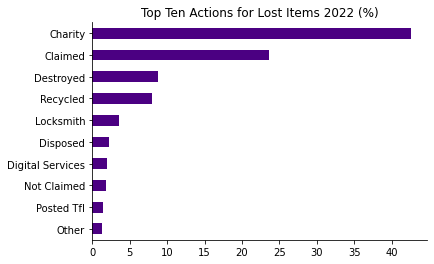

In [66]:
# Plot the top ten actions for lost items
ax = (df2022['Action'].value_counts(normalize = True)*100).head(10).plot(kind = 'barh',
                                                                             color = 'indigo', 
                                                                             title  = 'Top Ten Actions for Lost Items 2022 (%)');
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()

Approximately 43% is sent to charity, 24% claimed and 9% destroyed

### What percentage of each category is claimed?

What items are most likely to be reclaimed?

In [78]:
# Get the claims and the total lost
claims = pd.DataFrame(df2022[df2022['Action'] == 'Claimed']['Item'].value_counts().reset_index())
counts = pd.DataFrame(df2022['Item'].value_counts().reset_index())

# Merge the two, rename columns, add a percentage column and sort in descending order
merged = pd.merge(claims,counts, on = 'index')
merged.columns = ['Item','Claimed','Lost']
merged['%'] = round(merged['Claimed']/merged['Lost']*100,1)
merged.sort_values(by = '%',ascending=False)

,Item,Claimed,Lost,%
5,WALLET/PURSE,14,24,58.3
1,BAG,42,73,57.5
21,HEARING AID,1,2,50.0
0,ELECTRONICS,85,171,49.7
11,DL/PASSPORT,7,17,41.2
3,COAT/JACKET,20,59,33.9
10,ID CARD,8,25,32.0
9,DOCUMENTS/PAPERS,9,34,26.5
17,SHOES/BOOTS,1,4,25.0
7,DEBIT/CREDIT CARD,12,52,23.1


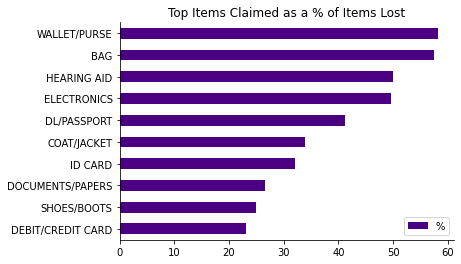

In [95]:
# Top items claimed
merged_top = merged.sort_values(by = '%',ascending=False).head(10)
merged_top = merged_top[['Item','%']].set_index('Item')
ax = merged_top.plot(kind = 'barh', 
                     color = 'indigo', 
                     title = 'Top Items Claimed as a % of Items Lost',
                    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(None)
ax.invert_yaxis()

What percentage likely to be destroyed?

In [97]:
# Get the destroyed and the total lost
dest = pd.DataFrame(df2022[df2022['Action'] == 'Destroyed']['Item'].value_counts().reset_index())
counts = pd.DataFrame(df2022['Item'].value_counts().reset_index())

# Merge the two, rename columns, add a percentage column and sort in descending order
merged2 = pd.merge(dest,counts, on = 'index')
merged2.columns = ['Item','Destroyed','Lost']
merged2['%'] = round(merged2['Destroyed']/merged2['Lost']*100,1)
merged2.sort_values(by = '%',ascending=False)

,Item,Destroyed,Lost,%
6,HOTEL ROOM CARD,1,1,100.0
1,DEBIT/CREDIT CARD,34,52,65.4
2,DOCUMENTS/PAPERS,17,34,50.0
0,MISCELLANEOUS,44,176,25.0
3,ID CARD,4,25,16.0
5,BOTTLE/CUP/MUG,2,41,4.9
8,WALLET/PURSE,1,24,4.2
4,BAG,2,73,2.7
7,COAT/JACKET,1,59,1.7


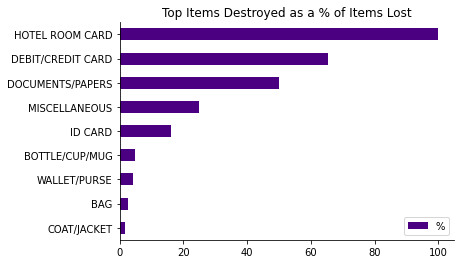

In [99]:
# Top items Destroyed
merged2_top = merged2.sort_values(by = '%',ascending=False).head(10)
merged2_top = merged2_top[['Item','%']].set_index('Item')
ax = merged2_top.plot(kind = 'barh', 
                     color = 'indigo', 
                     title = 'Top Items Destroyed as a % of Items Lost',
                    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(None)
ax.invert_yaxis()

What percentage likely to go to charity?

In [103]:
# Get the charity and the total lost
char = pd.DataFrame(df2022[df2022['Action'] == 'Charity']['Item'].value_counts().reset_index())
counts = pd.DataFrame(df2022['Item'].value_counts().reset_index())

# Merge the two, rename columns, add a percentage column and sort in descending order
merged3 = pd.merge(char,counts, on = 'index')
merged3.columns = ['Item','Charity','Lost']
merged3['%'] = round(merged3['Charity']/merged3['Lost']*100,1)
merged3.sort_values(by = '%',ascending=False)

,Item,Charity,Lost,%
17,HAIRBRUSH,1,1,100.0
7,GLOVES,31,31,100.0
12,TIE,9,9,100.0
3,SCARF,51,54,94.4
13,BELT,9,10,90.0
8,HAT,30,35,85.7
0,JEWELLERY,87,104,83.7
6,BOTTLE/CUP/MUG,34,41,82.9
10,JUMPER/CARDIGAN,13,16,81.2
1,GLASSES,72,96,75.0


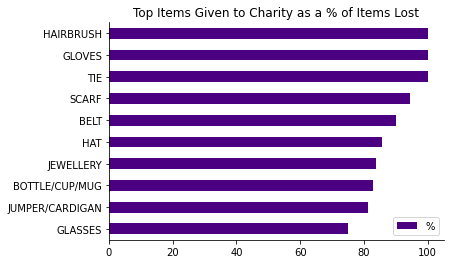

In [104]:
# Top items given to charity
merged3_top = merged3.sort_values(by = '%',ascending=False).head(10)
merged3_top = merged3_top[['Item','%']].set_index('Item')
ax = merged3_top.plot(kind = 'barh', 
                     color = 'indigo', 
                     title = 'Top Items Given to Charity as a % of Items Lost',
                    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(None)
ax.invert_yaxis()

What percentage recycled?

In [105]:
# Get the recycled and the total lost
recy = pd.DataFrame(df2022[df2022['Action'] == 'Recycled']['Item'].value_counts().reset_index())
counts = pd.DataFrame(df2022['Item'].value_counts().reset_index())

# Merge the two, rename columns, add a percentage column and sort in descending order
merged4 = pd.merge(recy,counts, on = 'index')
merged4.columns = ['Item','Recycled','Lost']
merged4['%'] = round(merged4['Recycled']/merged4['Lost']*100,1)
merged4.sort_values(by = '%',ascending=False)

,Item,Recycled,Lost,%
0,UMBRELLA,59,61,96.7
7,PEN,1,7,14.3
1,MISCELLANEOUS,25,176,14.2
3,DOCUMENTS/PAPERS,2,34,5.9
2,ELECTRONICS,5,171,2.9
4,BAG,2,73,2.7
6,KEYS,1,57,1.8
5,GLASSES,1,96,1.0


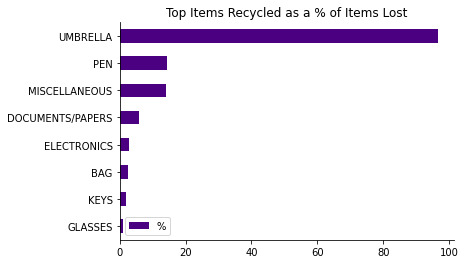

In [106]:
# Top items recycled
merged4_top = merged4.sort_values(by = '%',ascending=False).head(10)
merged4_top = merged4_top[['Item','%']].set_index('Item')
ax = merged4_top.plot(kind = 'barh', 
                     color = 'indigo', 
                     title = 'Top Items Recycled as a % of Items Lost',
                    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(None)
ax.invert_yaxis()

What percentage not claimed?

In [107]:
# Get the not claimed and the total lost
not_claim = pd.DataFrame(df2022[df2022['Action'] == 'Not Claimed']['Item'].value_counts().reset_index())
counts = pd.DataFrame(df2022['Item'].value_counts().reset_index())

# Merge the two, rename columns, add a percentage column and sort in descending order
merged5 = pd.merge(not_claim,counts, on = 'index')
merged5.columns = ['Item','Not Claimed','Lost']
merged5['%'] = round(merged5['Not Claimed']/merged5['Lost']*100,1)
merged5.sort_values(by = '%',ascending=False)

,Item,Not Claimed,Lost,%
1,CASH,5,15,33.3
4,PEN,1,7,14.3
0,ELECTRONICS,12,171,7.0
3,DOCUMENTS/PAPERS,1,34,2.9
2,MISCELLANEOUS,3,176,1.7


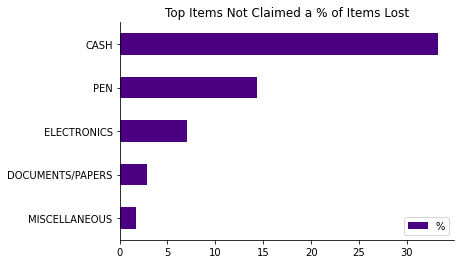

In [108]:
# Top items not claimed
merged5_top = merged5.sort_values(by = '%',ascending=False).head(10)
merged5_top = merged5_top[['Item','%']].set_index('Item')
ax = merged5_top.plot(kind = 'barh', 
                     color = 'indigo', 
                     title = 'Top Items Not Claimed a % of Items Lost',
                    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(None)
ax.invert_yaxis()

### How much time between being lost and action?

How quickly do things get claimed?

In [126]:
# Subtract the dates of lost item being recorded from the disposal date
df2022['Diff'] = df2022['Disposal_date']-df2022['Date']

In [127]:
# Get the longest values
df2022.sort_values(by = 'Diff',ascending = False)

,Date,Item,Action,Disposal_date,Month,Month_name,Diff
36,2022-07-01,WALLET/PURSE,Charity,2023-11-16,7,Jul,503 days
25,2022-07-01,CASH,Charity,2023-11-16,7,Jul,503 days
28,2022-07-01,CASH,Charity,2023-11-16,7,Jul,503 days
134,2022-08-01,CASH,Charity,2023-11-16,8,Aug,472 days
209,2022-09-01,CASH,Charity,2023-11-16,9,Sep,441 days
...,...,...,...,...,...,...,...
438,2022-06-01,MISCELLANEOUS,Not Claimed,NaT,6,Jun,NaT
54,2022-07-01,DOCUMENTS/PAPERS,Awaiting Collection,NaT,7,Jul,NaT
548,2022-11-01,ELECTRONICS,Awaiting Collection,NaT,11,Nov,NaT
550,2022-11-01,DEBIT/CREDIT CARD,Claimed,NaT,11,Nov,NaT


In [128]:
# Get basic stats
df2022['Diff'].describe()

count                           1165
mean     103 days 06:40:28.841201717
std       67 days 22:55:15.940308446
min              -239 days +00:00:00
25%                 51 days 00:00:00
50%                115 days 00:00:00
75%                133 days 00:00:00
max                503 days 00:00:00
Name: Diff, dtype: object

Maximum time is 503 days and the minimum is -239 days. This looks like an error so we need to look at the negatives

In [129]:
# First drop rows where we have no value
diff_days = df2022[df2022.Diff.notnull()].sort_values(by = 'Diff',ascending = False)
diff_days.tail(10)

,Date,Item,Action,Disposal_date,Month,Month_name,Diff
259,2022-04-01,BAG,Claimed,2022-04-01,4,Apr,0 days
256,2022-04-01,BAG,Claimed,2022-04-01,4,Apr,0 days
118,2022-08-01,ELECTRONICS,Claimed,2022-08-01,8,Aug,0 days
51,2022-02-01,WALLET/PURSE,Claimed,2022-02-01,2,Feb,0 days
18,2022-07-01,SCARF,Charity,2022-01-13,7,Jul,-169 days
193,2022-09-01,JEWELLERY,Charity,2022-01-13,9,Sep,-231 days
178,2022-09-01,BOTTLE/CUP/MUG,Charity,2022-01-13,9,Sep,-231 days
163,2022-09-01,JUMPER/CARDIGAN,Charity,2022-01-13,9,Sep,-231 days
180,2022-09-01,JEWELLERY,Charity,2022-01-13,9,Sep,-231 days
287,2022-09-01,MISCELLANEOUS,Recycled,2022-01-05,9,Sep,-239 days


We will just drop these from the dataframe

In [130]:
# Filter the dataframe to get these negative values
remove = diff_days.iloc[-6:]

# Create a list of the values
keys = list(remove.columns.values)

# Filter one against the other
i1 = diff_days.set_index(keys).index
i2 = remove.set_index(keys).index
diff_days = diff_days[~i1.isin(i2)]

In [131]:
# What items have the longest time to action being taken?
diff_days.sort_values(by = 'Diff',ascending = False).head(10)

,Date,Item,Action,Disposal_date,Month,Month_name,Diff
36,2022-07-01,WALLET/PURSE,Charity,2023-11-16,7,Jul,503 days
28,2022-07-01,CASH,Charity,2023-11-16,7,Jul,503 days
25,2022-07-01,CASH,Charity,2023-11-16,7,Jul,503 days
134,2022-08-01,CASH,Charity,2023-11-16,8,Aug,472 days
215,2022-09-01,CASH,Charity,2023-11-16,9,Sep,441 days
226,2022-09-01,CASH,Charity,2023-11-16,9,Sep,441 days
209,2022-09-01,CASH,Charity,2023-11-16,9,Sep,441 days
310,2022-10-01,WALLET/PURSE,Charity,2023-11-16,10,Oct,411 days
401,2022-11-01,COAT/JACKET,Claimed,2023-11-09,11,Nov,373 days
609,2022-12-01,CASH,Charity,2023-11-16,12,Dec,350 days


In [163]:
# Have a look at what happens to cash
diff_days[diff_days['Item']=='CASH']

,Date,Item,Action,Disposal_date,Month,Month_name,Diff,Days
25,2022-07-01,CASH,Charity,2023-11-16,7,Jul,503 days,503
28,2022-07-01,CASH,Charity,2023-11-16,7,Jul,503 days,503
134,2022-08-01,CASH,Charity,2023-11-16,8,Aug,472 days,472
209,2022-09-01,CASH,Charity,2023-11-16,9,Sep,441 days,441
215,2022-09-01,CASH,Charity,2023-11-16,9,Sep,441 days,441
226,2022-09-01,CASH,Charity,2023-11-16,9,Sep,441 days,441
609,2022-12-01,CASH,Charity,2023-11-16,12,Dec,350 days,350
613,2022-12-01,CASH,Charity,2023-11-16,12,Dec,350 days,350
584,2022-12-01,CASH,Charity,2023-11-16,12,Dec,350 days,350


In [133]:
# Get basic stats
diff_days['Diff'].describe()

count                           1159
mean     104 days 23:05:19.930974978
std       63 days 22:27:45.686854685
min                  0 days 00:00:00
25%                 65 days 00:00:00
50%                115 days 00:00:00
75%                133 days 00:00:00
max                503 days 00:00:00
Name: Diff, dtype: object

Looks like cash is has the longest time between being lost and claimed and then it is given to charity

In [134]:
# Check the datatypes
diff_days.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 36 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Date           1159 non-null   datetime64[ns] 
 1   Item           1159 non-null   object         
 2   Action         1159 non-null   object         
 3   Disposal_date  1159 non-null   datetime64[ns] 
 4   Month          1159 non-null   int64          
 5   Month_name     1159 non-null   object         
 6   Diff           1159 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), object(3), timedelta64[ns](1)
memory usage: 72.4+ KB


In [150]:
# Convert the timedelta to days
diff_days['Days'] = diff_days['Diff'].dt.days
diff_days

,Date,Item,Action,Disposal_date,Month,Month_name,Diff,Days
36,2022-07-01,WALLET/PURSE,Charity,2023-11-16,7,Jul,503 days,503
25,2022-07-01,CASH,Charity,2023-11-16,7,Jul,503 days,503
28,2022-07-01,CASH,Charity,2023-11-16,7,Jul,503 days,503
134,2022-08-01,CASH,Charity,2023-11-16,8,Aug,472 days,472
209,2022-09-01,CASH,Charity,2023-11-16,9,Sep,441 days,441
...,...,...,...,...,...,...,...,...
120,2022-08-01,BAG,Claimed,2022-08-02,8,Aug,1 days,1
259,2022-04-01,BAG,Claimed,2022-04-01,4,Apr,0 days,0
256,2022-04-01,BAG,Claimed,2022-04-01,4,Apr,0 days,0
118,2022-08-01,ELECTRONICS,Claimed,2022-08-01,8,Aug,0 days,0


In [146]:
# Group the diff days by item, get the mean number of days and sort descending
diff_days.groupby('Item',as_index = False)['Days'].mean().sort_values(by = 'Days',ascending = False)

,Item,Days
3,CASH,427.888889
11,HAIRBRUSH,152.000000
2,BOTTLE/CUP/MUG,130.025000
14,HOTEL ROOM CARD,123.000000
24,TIE,119.666667
10,GLOVES,119.612903
13,HEARING AID,119.500000
18,KEYS,119.368421
25,UMBRELLA,115.770492
19,MISCELLANEOUS,115.430233


In [151]:
# Group the diff days by item, get the mean number of days and sort descending
diffs = diff_days.groupby('Item',as_index = False)['Days'].mean().sort_values(by = 'Days',ascending = False).set_index('Item')
diffs

,Days
Item,
CASH,427.888889
HAIRBRUSH,152.000000
BOTTLE/CUP/MUG,130.025000
HOTEL ROOM CARD,123.000000
TIE,119.666667
GLOVES,119.612903
HEARING AID,119.500000
KEYS,119.368421
UMBRELLA,115.770492


''

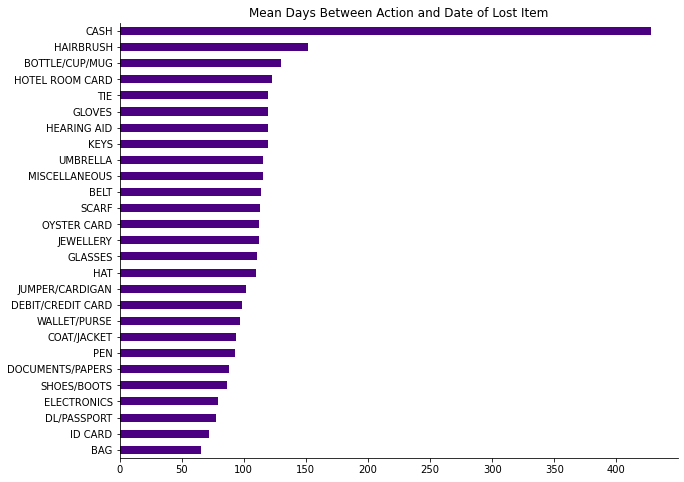

In [168]:
# Plot the mean days
fig, ax = plt.subplots(figsize = (10,8))
diffs.plot(ax = ax,kind = 'barh', color = 'indigo', legend = None)
#bars = ax.barh(width = diffs['Days'],y = diff_days['Item'],color = 'indigo')
plt.title('Mean Days Between Action and Date of Lost Item')
ax.set_ylabel(None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()
;

The longest time between the date of lost item being recorded and action being taken is for cash and wallet and purses, which might be expected as there may well be policies regarding how these are dealt with

#### Does the mean time differ according to type of action?

In [169]:
# Group the days by action
diff_days.groupby('Action',as_index = False)['Days'].mean().sort_values(by = 'Days',ascending = False)

,Action,Days
42,Taken To Storeroom T302A,286.000000
11,Digital Services,232.625000
14,"Driving Licence Posted Dvla, Cards Destroyed, ...",165.000000
19,Locksmith,153.930233
34,Posted To Rail Delivery Group,144.000000
22,Oystercard Posted Tfl / Bankcards Destroyed Cw...,139.000000
3,Cards Destroyed / Senio...,138.000000
21,Other,136.733333
18,Intellikey Recycled ...,136.000000
38,Recycled / Destroyed,135.000000


We will have a look at the top two in the list

In [170]:
# See what the items for the top action
diff_days[diff_days['Action']=='Taken To Storeroom T302A']

,Date,Item,Action,Disposal_date,Month,Month_name,Diff,Days
660,2022-12-01,MISCELLANEOUS,Taken To Storeroom T302A,2023-09-13,12,Dec,286 days,286


In [171]:
# See what the items are for the next one on the list
diff_days[diff_days['Action']=='Digital Services'].head()

,Date,Item,Action,Disposal_date,Month,Month_name,Diff,Days
199,2022-09-01,ELECTRONICS,Digital Services,2023-06-09,9,Sep,281 days,281
295,2022-09-01,BAG,Digital Services,2023-06-09,9,Sep,281 days,281
286,2022-09-01,ELECTRONICS,Digital Services,2023-06-09,9,Sep,281 days,281
188,2022-09-01,ELECTRONICS,Digital Services,2023-06-09,9,Sep,281 days,281
197,2022-09-01,ELECTRONICS,Digital Services,2023-06-09,9,Sep,281 days,281


Seems that valuable electronics and jewellery might be taken to a special department or location

In [172]:
# See what the items are for locksmits
diff_days[diff_days['Action']=='Locksmith'].head()

,Date,Item,Action,Disposal_date,Month,Month_name,Diff,Days
37,2022-07-01,KEYS,Locksmith,2023-02-14,7,Jul,228 days,228
68,2022-07-01,KEYS,Locksmith,2023-02-14,7,Jul,228 days,228
60,2022-07-01,KEYS,Locksmith,2023-02-14,7,Jul,228 days,228
191,2022-03-01,KEYS,Locksmith,2022-10-07,3,Mar,220 days,220
508,2022-11-01,KEYS,Locksmith,2023-06-06,11,Nov,217 days,217


As we expect, keys to a locksmith

#### What items have the quickest action?

In [173]:
# Get items that have action in less than a week
diff_days[diff_days['Days']<7].head(10)

,Date,Item,Action,Disposal_date,Month,Month_name,Diff,Days
32,2022-07-01,ELECTRONICS,Claimed,2022-07-07,7,Jul,6 days,6
412,2022-06-01,ELECTRONICS,Claimed,2022-06-07,6,Jun,6 days,6
11,2022-07-01,GLASSES,Claimed,2022-07-07,7,Jul,6 days,6
428,2022-11-01,WALLET/PURSE,Claimed,2022-11-07,11,Nov,6 days,6
31,2022-07-01,MISCELLANEOUS,Claimed,2022-07-07,7,Jul,6 days,6
309,2022-10-01,KEYS,Claimed,2022-10-07,10,Oct,6 days,6
175,2022-09-01,ELECTRONICS,Claimed,2022-09-07,9,Sep,6 days,6
179,2022-09-01,MISCELLANEOUS,Claimed,2022-09-07,9,Sep,6 days,6
168,2022-09-01,WALLET/PURSE,Claimed,2022-09-07,9,Sep,6 days,6
262,2022-04-01,COAT/JACKET,Claimed,2022-04-07,4,Apr,6 days,6


In [143]:
# Groupby action
diff_days[diff_days['Days']<7].groupby('Action',as_index = False)['Date'].count()

,Action,Date
0,Claimed,48
1,Collected By Servest Manager,1
2,Posted To Freepost Po Box 3037,1


A range of different items and crop up and they are claimed

* As we might expect the items which have a short amount of time between being recorded as lost and action being taken are those that are claimed. 
* Other items are put into storage or kept for a period of time and then destroyed, recycled, sent to charity etc.

### How has the type of item lost changed over the period of data?

In [1821]:
all_files

['C:\\Users\\imoge\\Downloads\\LostProperty\\Jan--Jun2018.csv',
 'C:\\Users\\imoge\\Downloads\\LostProperty\\Jan--June2016.csv',
 'C:\\Users\\imoge\\Downloads\\LostProperty\\Jan--June2017.csv',
 'C:\\Users\\imoge\\Downloads\\LostProperty\\Jan--June2019.csv',
 'C:\\Users\\imoge\\Downloads\\LostProperty\\Jan--June2020.csv',
 'C:\\Users\\imoge\\Downloads\\LostProperty\\Jan--June2021.csv',
 'C:\\Users\\imoge\\Downloads\\LostProperty\\Jan--June2022.csv',
 'C:\\Users\\imoge\\Downloads\\LostProperty\\Jan--June2023.csv',
 'C:\\Users\\imoge\\Downloads\\LostProperty\\Jan-June2015.csv',
 'C:\\Users\\imoge\\Downloads\\LostProperty\\Jul--Dec2015.csv',
 'C:\\Users\\imoge\\Downloads\\LostProperty\\July--Dec2016.csv',
 'C:\\Users\\imoge\\Downloads\\LostProperty\\July--Dec2019.csv',
 'C:\\Users\\imoge\\Downloads\\LostProperty\\July--Dec2020.csv',
 'C:\\Users\\imoge\\Downloads\\LostProperty\\July--Dec2021.csv',
 'C:\\Users\\imoge\\Downloads\\LostProperty\\July--Dec2022.csv',
 'C:\\Users\\imoge\\Download

In [175]:
# Read in the data
df2013 = pd.read_csv(all_files[16],skiprows = 2)

# Choose item column
df2013 = df2013[['Jan-13']]

# Rename
df2013.columns = ['Item']

df2013['Item'].unique()

array(['RUCKSACK', 'NOTEBOOK', 'KEY & FOB ON LANYARD', 'GLOVES',
       'UMBRELLA', 'EAR PHONES', 'GLOVES + SCARF',
       'FOLDER CONTAINING PAPER', 'BUS PASS', 'HAT + GLASSES + EARRING',
       'BOTTLE OF WINE IN BAG', 'SPECTACLES CASE', 'JACKETS', 'RING',
       'GLOVE', 'SCARF', 'MANUSCRIPT BOOK', 'JACKET',
       'NOTEBOOK WITH DOCUMENTS', 'USB MEMORY STICK', 'PHONE CHARGER',
       'HAT', 'BAG CONTAINING TRAINERS, EAR PHONES & GYM CLOTHES', 'IPAD',
       'CAMERA IN CASE', 'MOBILE PHONE', 'BROLLY', 'IPHONE',
       'IPHONE IN CASE', 'CASHCARD', 'GLASSES', 'KEYS + KEY FOB', 'CASH',
       'WALLET + CARDS + DRIVING LICENCE', 'WALLET + CASH + CARDS',
       'PARLIAMENTARY PASS', 'WATCH', 'PASS + INHALER + PEN + KEYS',
       'KEYS + FOBS & CASH', 'RUCKSACK CONTAINING NEWSPAPER + TICKET',
       'MITTENS', 'MEMORY CARD IN CASE', 'BRIEFCASE', 'DIARY',
       'BIKE LIGHT', 'COAT', 'KEY', 'REMOTE-TYPE DEVICE', 'PENDANT',
       'CASE', 'HEADSCARF', 'SHAWL', 'CARDIGAN',
       'CIGAR HOL

There is a lot of inconsistency in the categories here. We will try and clean it up a bit so we can compare these items to those lost in 2022 and see if there is anything interesting we can conclude.

The data was saved out to a csv and cleaned up in Excel using filtering, as this was the quickest and easiest way to look at the data as it is not a very large dataset.

In [176]:
# Save out file to csv (don't uncomment unless want to save)
#df2013.to_csv("\Datasets\2013toclean.csv")

In [209]:
path = r'C:\Users\imoge\AllMLProjects\Data\LostProperty\2013toclean.csv'

# Read back in cleaned data
df2013 = pd.read_csv(path, index_col = 0)

In [210]:
df2013

,Item
0,RUCKSACK
1,NOTEBOOK
2,KEY & FOB ON LANYARD
3,GLOVES
4,UMBRELLA
...,...
1434,HOME BEAR BADGE
1435,BLUE M&S JUMPER
1436,RUSSIAN HAT
1437,GREY HAT WITH BLACK STRIPE


In [216]:
# Clean up the dataframe a bit more
#df2013.drop(columns = 'Item',inplace = True)
#df2013.columns = ["Index","Item"]
#df2013.set_index('Index',inplace = True)
df2013['Item'] = df2013['Item'].str.upper()
df2013.dropna(inplace = True)
#df2013.sort_index(inplace = True)
#df2013

In [217]:
# Check the shape
df2013.shape

(1438, 1)

In [225]:
# Set the case to the same as 2022
pd.DataFrame(df2013['Item'].value_counts()).head(10)

,Item
SCARF,89
CASH,68
UMBRELLA,58
HAT,41
GLASSES,33
GLOVES,28
GLOVE,27
MOBILE PHONE,25
OYSTER CARD,13
CARDIGAN,13


We can see right away that there are differences between 2013 and 2022 (some 9 years later)

* For a start, the later dataset has already been split into the loss categories of electronics, miscellaneous etc, whereas the 2013 data was raw and detailed information about each item, which has then had to be allocated to these categories. 
* The miscellaneous category is quite large for the latest data and we can't really get much information on what this might include, whereas we can dig deep on the 2013 data.
* Electronics are still a large category for lost items and in 2013 we can see a lot of detail about what this included (laptops, phones, blackberries etc). For 2022, we do not have this data as it is all lumped into the one category for electronics. It would have been interesting to compare the types of electronics between the two periods, - it is unlikely that Blackberries would crop up for example.

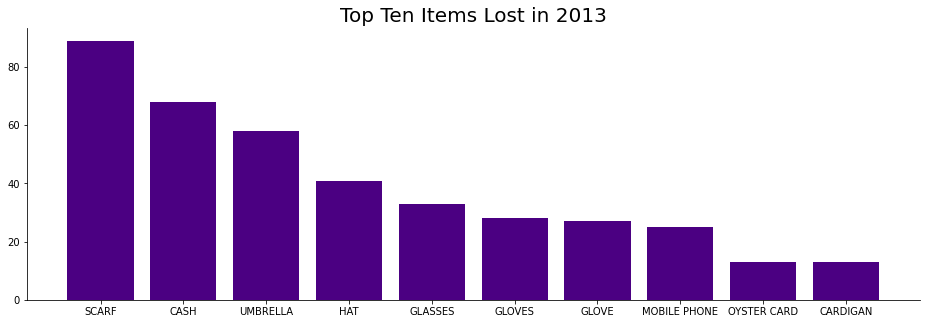

In [226]:
# Plot the top ten items lost in 2013
lost_2013 = pd.DataFrame(df2013['Item'].value_counts().head(10))
lost_2013

fig, ax = plt.subplots(figsize = (16,5))
plt.bar(x= lost_2013.index,height= lost_2013['Item'],color = 'indigo')
plt.title('Top Ten Items Lost in 2013',fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

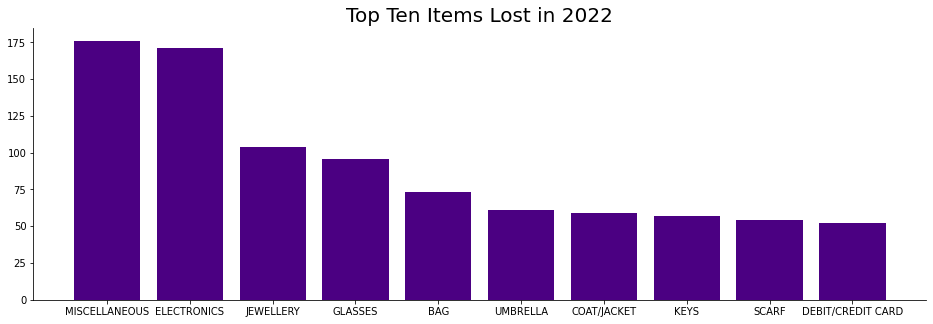

In [227]:
# Replot the data for 2022 to compare
fig, ax = plt.subplots(figsize = (16,5))
plt.bar(x= lost_items['Item'],height= lost_items['Date'],color = 'indigo')
plt.title('Top Ten Items Lost in 2022',fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

We should perhaps amalgamate the various types of electronics specified in 2013 into a category for electronics, in order that we can compare the two periods better

In [229]:
# Get unique items for 2013 and pick out those that we might include as electronics
df2013['Item'].unique()

array(['RUCKSACK', 'NOTEBOOK', 'KEY & FOB ON LANYARD', 'GLOVES',
       'UMBRELLA', 'EAR PHONES', 'GLOVES + SCARF',
       'FOLDER CONTAINING PAPER', 'BUS PASS', 'HAT + GLASSES + EARRING',
       'BOTTLE OF WINE IN BAG', 'SPECTACLES CASE', 'JACKETS', 'RING',
       'GLOVE', 'SCARF', 'MANUSCRIPT BOOK', 'JACKET',
       'NOTEBOOK WITH DOCUMENTS', 'USB MEMORY STICK', 'PHONE CHARGER',
       'HAT', 'BAG CONTAINING TRAINERS, EAR PHONES & GYM CLOTHES', 'IPAD',
       'CAMERA IN CASE', 'MOBILE PHONE', 'BROLLY', 'IPHONE',
       'IPHONE IN CASE', 'CASHCARD', 'GLASSES', 'KEYS + KEY FOB', 'CASH',
       'WALLET + CARDS + DRIVING LICENCE', 'WALLET + CASH + CARDS',
       'PARLIAMENTARY PASS', 'WATCH', 'PASS + INHALER + PEN + KEYS',
       'KEYS + FOBS & CASH', 'RUCKSACK CONTAINING NEWSPAPER + TICKET',
       'MITTENS', 'MEMORY CARD IN CASE', 'BRIEFCASE', 'DIARY',
       'BIKE LIGHT', 'COAT', 'KEY', 'REMOTE-TYPE DEVICE', 'PENDANT',
       'CASE', 'HEADSCARF', 'SHAWL', 'CARDIGAN',
       'CIGAR HOL

Lets create a wordcloud to show both

In [230]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [247]:
# Use a function to plot a wordcloud (we don't need stopwords)
def wordcloud(df,title):
    
    # Create text object
    text = " ".join(review for review in df.Item)
    
    # Set stopwords
    stopwords = set(STOPWORDS)
    stopwords = ["black"] + list(STOPWORDS)
        
    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_words = 500,
                          colormap = 'Purples',
                          stopwords = stopwords,
                          collocations = True,
                          background_color="Black"
                          ).generate(text)
    
    # Plot the wordcloud
    plt.figure(figsize = (10,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

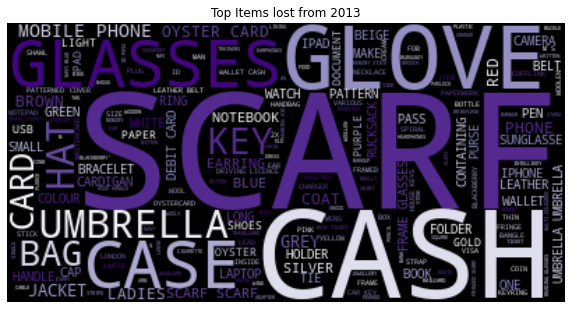

In [248]:
# Plot for 2013
wordcloud(df2013,'Top Items lost from 2013')

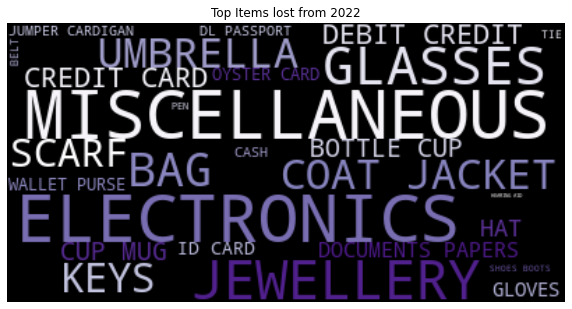

In [249]:
# Plot for 2022
wordcloud(df2022,'Top Items lost from 2022')

Interesting items found within the Miscellaneous category in 2013 include a tin of Dulux paint, a clarinet and binoculars

This analysis has identified a few interesting things about the lost property data from the parliamentary estate. 